# Compute matrix profiles

## Introduction to matrix profiles
The matrix profile is a rather simple method to detect motifs and anomalies in time series data. It can be used to find global similarities in a time series or to detect similar features by a query search using sliding windows. The basic idea is to create a window of size m and slide this window along a time series. Then the euclidian distance between 



With a time series of length n and a window size of m we extract n-m+1 subsequences. The global matrix profile finds the distance from a subsequence to a neirest neighbour.  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matrixprofile as mp
import glob as glob
import matplotlib.gridspec as gridspec
import random
from scipy.signal import butter,filtfilt
from matplotlib import colors
plt.rcParams.update({'font.size': 17})



%matplotlib notebook



In [2]:
"""Functions from B_series_functions"""

"""Create a time array from B series indexes"""
def time_array(start,end):
    time_s = np.linspace(0,end-start,end-start)/100#convert to seconds
    return time_s

"""find index of time in video of a given drifter deployment"""
def index_finder(cp_times,time_s,start_n):
    length = len(cp_times)
    indexes = np.zeros(length)
    for i in range(length):#find indexes in time_s of the features
        indexes[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, cp_times[i], 0.01)))    
    indexes = indexes.astype(int) + start_n
    return indexes

def read_B_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []

    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_B_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/*.csv")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

def butter_pass_filter(data, cutoff, fs, order,btype='high'):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = filtfilt(b, a, data)
    return y

# Load data for mp

In [3]:
####################
#Cross section A5
####################
A5_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A5"
A5B14 = pd.read_csv(A5_path+"/B14.csv",names = ["time s/100","pressure"],header = 0)
A5B17 = pd.read_csv(A5_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A5B56 = pd.read_csv(A5_path+"/B56.csv",names = ["time s/100","pressure"],header = 0)
A5B75 = pd.read_csv(A5_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A5B79 = pd.read_csv(A5_path+"/B79.csv",names = ["time s/100","pressure"],header = 0)
A5B80 = pd.read_csv(A5_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A5B82 = pd.read_csv(A5_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A5B85 = pd.read_csv(A5_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)
A5B86 = pd.read_csv(A5_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

A5B14 = A5B14.iloc[19015:20680]
A5B17 = A5B17.iloc[21495:23125]
A5B56 = A5B56.iloc[21744:23239]
A5B75 = A5B75.iloc[23382:25032]
A5B79 = A5B79.iloc[25561:27359]
A5B80 = A5B80.iloc[27629:29151]
A5B82 = A5B82.iloc[30010:31527]
A5B85 = A5B85.iloc[32284:34086]
A5B86 = A5B86.iloc[34664:36260]

####################
#Cross section A6
####################
A6_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A6"
A6B13 = pd.read_csv(A6_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A6B33 = pd.read_csv(A6_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A6B55 = pd.read_csv(A6_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A6B65 = pd.read_csv(A6_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A6B68 = pd.read_csv(A6_path+"/B68.csv",names = ["time s/100","pressure"],header = 0)
A6B73 = pd.read_csv(A6_path+"/B73.csv",names = ["time s/100","pressure"],header = 0)
A6B74 = pd.read_csv(A6_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A6B78 = pd.read_csv(A6_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)


A6B13 = A6B13.iloc[11753:14290]
A6B33 = A6B33.iloc[18090:20205]
A6B55 = A6B55.iloc[19786:21671]
A6B65 = A6B65.iloc[19807:21768]
A6B68 = A6B68.iloc[20381:22375]
A6B73 = A6B73.iloc[21572:23631]#[21592:23423]
A6B74 = A6B74.iloc[23217:25225]
A6B78 = A6B78.iloc[24423:26560]


####################
#Cross section A7
####################
A7_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A7"
A7B14 = pd.read_csv(A7_path+"/B14.csv",names = ["time s/100","pressure"],header = 0)
A7B17 = pd.read_csv(A7_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A7B56 = pd.read_csv(A7_path+"/B56.csv",names = ["time s/100","pressure"],header = 0)
A7B68 = pd.read_csv(A7_path+"/B68.csv",names = ["time s/100","pressure"],header = 0)
A7B73 = pd.read_csv(A7_path+"/B73.csv",names = ["time s/100","pressure"],header = 0)
A7B78 = pd.read_csv(A7_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)
A7B79 = pd.read_csv(A7_path+"/B79.csv",names = ["time s/100","pressure"],header = 0)
A7B82 = pd.read_csv(A7_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A7B83 = pd.read_csv(A7_path+"/B83.csv",names = ["time s/100","pressure"],header = 0)

A7B14 = A7B14.iloc[14211:17500]
A7B17 = A7B17.iloc[15669:18274]
A7B56 = A7B56.iloc[16822:19836]
A7B68 = A7B68.iloc[17281:20490]
A7B73 = A7B73.iloc[17958:20675]
A7B78 = A7B78.iloc[18848:21768]
A7B79 = A7B79.iloc[20125:23334]
A7B82 = A7B82.iloc[22099:25487]
A7B83 = A7B83.iloc[23970:26942]




####################
#Cross section A8
####################
A8_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A8"
A8B10 = pd.read_csv(A8_path+"/B10.csv",names = ["time s/100","pressure"],header = 0)
A8B13 = pd.read_csv(A8_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A8B33 = pd.read_csv(A8_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A8B55 = pd.read_csv(A8_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A8B65 = pd.read_csv(A8_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A8B74 = pd.read_csv(A8_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A8B75 = pd.read_csv(A8_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A8B80 = pd.read_csv(A8_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A8B84 = pd.read_csv(A8_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A8B85 = pd.read_csv(A8_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)
A8B86 = pd.read_csv(A8_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

x = A8B13["pressure"].values
A8B80 = A8B80.iloc[15795:19699]
A8B10 = A8B10.iloc[5704:10144]
A8B13 = A8B13.iloc[6600:10428]
A8B33 = A8B33.iloc[8207:12000]
A8B55 = A8B55.iloc[10123:13754]
A8B65 = A8B65.iloc[10988:14720]#This sensor might be faulty
A8B74 = A8B74.iloc[11687:15677]
A8B75 = A8B75.iloc[14682:19004]
A8B84 = A8B84.iloc[18480:22787]
A8B85 = A8B85.iloc[19545:23467]
A8B86 = A8B86.iloc[20255:24166]

#load exel sheet of drifter observations
B80_A8_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A8_B80.xlsx"
B80_A8_SS = pd.read_excel(B80_A8_excel_sheet_path,header = 3)
A8_steps = B80_A8_SS[B80_A8_SS["Feature id"] == 1].reset_index(drop=True)
A8_start = 15784
A8_end = 19699
time_A8 = time_array(A8_start,A8_end)
A8_HF_idx = index_finder(B80_A8_SS["Deployment_time"],time_A8,A8_start)-A8_start
A8_steps_idx = index_finder(A8_steps["Deployment_time"],time_A8,A8_start)-A8_start


#load exel sheet of drifter observations
B13_A8_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A8_B13.xlsx"
B13_A8_SS = pd.read_excel(B13_A8_excel_sheet_path,header = 3)
B13_A8_steps = B13_A8_SS[B13_A8_SS["Feature id"] == 1].reset_index(drop=True)


B13_A8_start = 6600#
B13_A8_end = 11500#

time_B13_A8 = time_array(B13_A8_start,B13_A8_end)

B13_A8_HF_idx = index_finder(B13_A8_SS["Deployment_time"],time_B13_A8,B13_A8_start)-B13_A8_start
B13_A8_steps_idx = index_finder(B13_A8_steps["Deployment_time"],time_B13_A8,B13_A8_start)-B13_A8_start

####################
#Cross section A9
####################
A9_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A9"

A9B10 = pd.read_csv(A9_path+"/B10.csv",names=["time s/100", "pressure"],header=0)
A9B13 = pd.read_csv(A9_path+"/B13.csv",names=["time s/100", "pressure"],header=0)
A9B17 = pd.read_csv(A9_path+"/B17.csv",names=["time s/100", "pressure"],header=0)
A9B33 = pd.read_csv(A9_path+"/B33.csv",names=["time s/100", "pressure"],header=0)
A9B75 = pd.read_csv(A9_path+"/B75.csv",names=["time s/100", "pressure"],header=0)
A9B78 = pd.read_csv(A9_path+"/B78.csv",names=["time s/100", "pressure"],header=0)
A9B79 = pd.read_csv(A9_path+"/B79.csv",names=["time s/100", "pressure"],header=0)
A9B84 = pd.read_csv(A9_path+"/B84.csv",names=["time s/100", "pressure"],header=0)
A9B85 = pd.read_csv(A9_path+"/B85.csv",names=["time s/100", "pressure"],header=0)
A9B86 = pd.read_csv(A9_path+"/B86.csv",names=["time s/100", "pressure"],header=0)

A9B10 = A9B10.iloc[8359:13180]
A9B13 = A9B13.iloc[10148:14785]
A9B17 = A9B17.iloc[13686:18929]
A9B33 = A9B33.iloc[16396:21111]
A9B75 = A9B75.iloc[19050:24462]
A9B78 = A9B78.iloc[21725:26538]
A9B79 = A9B79.iloc[24460:29190]
A9B84 = A9B84.iloc[28348:33487]
A9B85 = A9B85.iloc[29647:34314]
A9B86 = A9B86.iloc[32429:37461]

####################
#Cross section A10
####################
A10_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A10"

A10B14 = pd.read_csv(A10_path+"/B14.csv",names=["time s/100", "pressure"],header=0)
A10B55 = pd.read_csv(A10_path+"/B55.csv",names=["time s/100", "pressure"],header=0)
A10B56 = pd.read_csv(A10_path+"/B56.csv",names=["time s/100", "pressure"],header=0)
A10B65 = pd.read_csv(A10_path+"/B65.csv",names=["time s/100", "pressure"],header=0)
A10B73 = pd.read_csv(A10_path+"/B73.csv",names=["time s/100", "pressure"],header=0)
A10B74 = pd.read_csv(A10_path+"/B74.csv",names=["time s/100", "pressure"],header=0)
A10B80 = pd.read_csv(A10_path+"/B80.csv",names=["time s/100", "pressure"],header=0)
A10B82 = pd.read_csv(A10_path+"/B82.csv",names=["time s/100", "pressure"],header=0)
A10B83 = pd.read_csv(A10_path+"/B83.csv",names=["time s/100", "pressure"],header=0)

A10B14 = A10B14.iloc[5777:12652]
A10B55 = A10B55.iloc[11000:18258]
A10B56 = A10B56.iloc[13765:20552]
A10B65 = A10B65.iloc[16275:22900]
A10B73 = A10B73.iloc[21650:28642]
A10B74 = A10B74.iloc[24142:31092]
A10B80 = A10B80.iloc[26942:33700]
A10B82 = A10B82.iloc[29800:36285]
A10B83 = A10B83.iloc[33400:40790]

####################
#Cross section A11
####################
A11_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A11"
A11B55 = pd.read_csv(A11_path+"/B55.csv",names=["time s/100", "pressure"],header=0)
A11B56 = pd.read_csv(A11_path+"/B56.csv",names=["time s/100", "pressure"],header=0)
A11B74 = pd.read_csv(A11_path+"/B74.csv",names=["time s/100", "pressure"],header=0)
A11B79 = pd.read_csv(A11_path+"/B79.csv",names=["time s/100", "pressure"],header=0)
A11B80 = pd.read_csv(A11_path+"/B80.csv",names=["time s/100", "pressure"],header=0)
A11B82 = pd.read_csv(A11_path+"/B82.csv",names=["time s/100", "pressure"],header=0)
A11B83 = pd.read_csv(A11_path+"/B83.csv",names=["time s/100", "pressure"],header=0)
A11B84 = pd.read_csv(A11_path+"/B84.csv",names=["time s/100", "pressure"],header=0)
A11B85 = pd.read_csv(A11_path+"/B85.csv",names=["time s/100", "pressure"],header=0)

A11B55 = A11B55.iloc[11680:18800]
A11B56 = A11B56.iloc[13000:20150]
A11B74 = A11B74.iloc[14870:22443]
A11B80 = A11B80.iloc[18565:26300]
A11B82 = A11B82.iloc[20500:27868]
A11B85 = A11B85.iloc[27000:35300]

####################
#Cross section A12
####################
A12_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A12"

A12B10 = pd.read_csv(A12_path+"/B10.csv",names=["time s/100", "pressure"],header=0)
A12B13 = pd.read_csv(A12_path+"/B13.csv",names=["time s/100", "pressure"],header=0)
A12B14 = pd.read_csv(A12_path+"/B14.csv",names=["time s/100", "pressure"],header=0)
A12B17 = pd.read_csv(A12_path+"/B17.csv",names=["time s/100", "pressure"],header=0)
A12B33 = pd.read_csv(A12_path+"/B33.csv",names=["time s/100", "pressure"],header=0)
A12B65 = pd.read_csv(A12_path+"/B65.csv",names=["time s/100", "pressure"],header=0)
A12B73 = pd.read_csv(A12_path+"/B73.csv",names=["time s/100", "pressure"],header=0)
A12B75 = pd.read_csv(A12_path+"/B75.csv",names=["time s/100", "pressure"],header=0)
A12B78 = pd.read_csv(A12_path+"/B78.csv",names=["time s/100", "pressure"],header=0)
A12B86 = pd.read_csv(A12_path+"/B86.csv",names=["time s/100", "pressure"],header=0)

A12B13 = A12B13.iloc[9300:17666]
A12B14 = A12B14.iloc[12150:21190]
A12B17 = A12B17.iloc[14700:23640]
A12B33 = A12B33.iloc[16500:25650]
A12B65 = A12B65.iloc[18630:27150]#drifting downwards
A12B73 = A12B73.iloc[23737:33354]
A12B75 = A12B75.iloc[26000:35000]
A12B78 = A12B78.iloc[28800:37760]
A12B86 = A12B86.iloc[31445:40978]

####################
#Cross section A13
#B14 file is messed up so we dont have the drifter features because this was the deployment filmed
####################
A13_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A13"
A13B14 = pd.read_csv(A13_path+"/B14.csv",names = ["time s/100","pressure"],header = 0)
A13B33 = pd.read_csv(A13_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A13B55 = pd.read_csv(A13_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A13B65 = pd.read_csv(A13_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A13B74 = pd.read_csv(A13_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A13B75 = pd.read_csv(A13_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A13B79 = pd.read_csv(A13_path+"/B79.csv",names = ["time s/100","pressure"],header = 0)
A13B80 = pd.read_csv(A13_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A13B86 = pd.read_csv(A13_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

#A13B14 = A13B14#incomplete
#A13B33 = A13B33#incomplete
A13B55 = A13B55.iloc[12846:22599]
A13B65 = A13B65.iloc[14440:24317]
A13B74 = A13B74.iloc[17584:27731]
A13B75 = A13B75.iloc[20766:30950]
A13B79 = A13B79.iloc[22944:32801]
A13B80 = A13B80.iloc[24547:34510]
A13B86 = A13B86.iloc[29189:41027]

####################
#Cross section A14
####################
A14_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A14"
A14B13 = pd.read_csv(A14_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A14B17 = pd.read_csv(A14_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A14B56 = pd.read_csv(A14_path+"/B56.csv",names = ["time s/100","pressure"],header = 0)
A14B78 = pd.read_csv(A14_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)
A14B82 = pd.read_csv(A14_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A14B84 = pd.read_csv(A14_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A14B85 = pd.read_csv(A14_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)

#cut out when drifter lying still
A14B13 = A14B13.iloc[6000:18050]
A14B17 = A14B17.iloc[10350:23800]
A14B56 = A14B56.iloc[12500:26500]
A14B78 = A14B78.iloc[20250:33500]
A14B82 = A14B82.iloc[23000:36500]
A14B84 = A14B84.iloc[26400:-1]
A14B85 = A14B85.iloc[26600:40200]
#A14B85['pressure'].plot(figsize = (10,7))

#load exel sheet of drifter observations
B56_A14_excel_sheet_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/drifter_videos/2020/Video_features_A14_B56_reanalysed.xlsx"
B56_A14_SS = pd.read_excel(B56_A14_excel_sheet_path,header = 8)
B56_A14_SS["Middle_t"] = B56_A14_SS["Stop_corr"]-(B56_A14_SS["Stop_corr"]-B56_A14_SS["Start_corr"])/2
A14steps = B56_A14_SS[B56_A14_SS["Feature id"] == 1].reset_index(drop=True)
A14other = B56_A14_SS[B56_A14_SS["Feature id"] == 2].reset_index(drop=True)
time_A14 = time_array(12500,26500)
A14_HF_idx = index_finder(B56_A14_SS["Middle_t"],time_A14,12500)-12500
steps_idx = index_finder(A14steps["Middle_t"],time_A14,12500)-12500
#A14_HF_stop_idx = index_finder(B56_A14_HF_stop,time_A14,start)-start

####################
#Cross section A15
####################

A15_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A15"
A15B33 = pd.read_csv(A15_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A15B55 = pd.read_csv(A15_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A15B68 = pd.read_csv(A15_path+"/B68.csv",names = ["time s/100","pressure"],header = 0)
A15B74 = pd.read_csv(A15_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A15B80 = pd.read_csv(A15_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A15B84 = pd.read_csv(A15_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A15B85 = pd.read_csv(A15_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)

A15B33 = A15B33.iloc[8108:23980]
A15B55 = A15B55.iloc[10062:25257]
A15B68 = A15B68.iloc[14668:31040]
A15B74 = A15B74.iloc[16715:32478]
#A15B80 = A15B80.iloc[:]#incomplete
A15B84 = A15B84.iloc[22442:40024]
A15B85 = A15B85.iloc[23411:39380]

####################
#Cross section A16
####################

A16_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A16"

A16B13 = pd.read_csv(A16_path +'/B13.csv',names = ["time s/100","pressure"],header=0)
A16B17 = pd.read_csv(A16_path +'/B17.csv',names = ["time s/100","pressure"],header=0)
A16B33 = pd.read_csv(A16_path +'/B33.csv',names = ["time s/100","pressure"],header=0)
A16B55 = pd.read_csv(A16_path +'/B55.csv',names = ["time s/100","pressure"],header=0)
A16B56 = pd.read_csv(A16_path +'/B56.csv',names = ["time s/100","pressure"],header=0)
A16B74 = pd.read_csv(A16_path +'/B74.csv',names = ["time s/100","pressure"],header=0)
A16B80 = pd.read_csv(A16_path +'/B80.csv',names = ["time s/100","pressure"],header=0)
A16B84 = pd.read_csv(A16_path +'/B84.csv',names = ["time s/100","pressure"],header=0)
A16B85 = pd.read_csv(A16_path +'/B85.csv',names = ["time s/100","pressure"],header=0)

A16B13 = A16B13.iloc[4739:23370]
A16B33 = A16B33.iloc[9239:27460]
A16B55 = A16B55.iloc[11369:29671]
A16B74 = A16B74.iloc[17658:36075]
A16B84 = A16B84.iloc[22264:41066]
A16B85 = A16B85.iloc[23763:42589]

####################
#Cross section A17
####################

A17_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A17"

A17B14 = pd.read_csv(A17_path +'/B14.csv',names = ["time s/100","pressure"],header=0)
A17B65 = pd.read_csv(A17_path +'/B65.csv',names = ["time s/100","pressure"],header=0)
A17B73 = pd.read_csv(A17_path +'/B73.csv',names = ["time s/100","pressure"],header=0)
A17B75 = pd.read_csv(A17_path +'/B75.csv',names = ["time s/100","pressure"],header=0)
A17B78 = pd.read_csv(A17_path +'/B78.csv',names = ["time s/100","pressure"],header=0)
A17B82 = pd.read_csv(A17_path +'/B82.csv',names = ["time s/100","pressure"],header=0)
A17B83 = pd.read_csv(A17_path +'/B83.csv',names = ["time s/100","pressure"],header=0)
A17B86 = pd.read_csv(A17_path +'/B86.csv',names = ["time s/100","pressure"],header=0)

A17B73 = A17B73.iloc[10632:33673]
A17B78 = A17B78.iloc[14843:37333]
A17B82 = A17B82.iloc[20020:]# this one might have turned off mid dep
A17B83 = A17B83.iloc[23492:41199]# this one might be faulty, pressure drops to 0

####################
#Cross section A18
####################

A18_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A18"
A18B10 = pd.read_csv(A18_path+"/B10.csv",names = ["time s/100","pressure"],header = 0)
A18B14 = pd.read_csv(A18_path+"/B14.csv",names = ["time s/100","pressure"],header = 0)
A18B17 = pd.read_csv(A18_path+"/B17.csv",names = ["time s/100","pressure"],header = 0)
A18B33 = pd.read_csv(A18_path+"/B33.csv",names = ["time s/100","pressure"],header = 0)
A18B73 = pd.read_csv(A18_path+"/B73.csv",names = ["time s/100","pressure"],header = 0)
A18B74 = pd.read_csv(A18_path+"/B74.csv",names = ["time s/100","pressure"],header = 0)
A18B75 = pd.read_csv(A18_path+"/B75.csv",names = ["time s/100","pressure"],header = 0)
A18B78 = pd.read_csv(A18_path+"/B78.csv",names = ["time s/100","pressure"],header = 0)
A18B82 = pd.read_csv(A18_path+"/B82.csv",names = ["time s/100","pressure"],header = 0)
A18B83 = pd.read_csv(A18_path+"/B83.csv",names = ["time s/100","pressure"],header = 0)
A18B86 = pd.read_csv(A18_path+"/B86.csv",names = ["time s/100","pressure"],header = 0)

A18B10 =A18B10.iloc[723:24359]#dr
A18B17 =A18B17.iloc[1118:34519]
A18B33 =A18B33.iloc[452:27845]
A18B73 =A18B73.iloc[330:25264]
A18B74 =A18B74.iloc[651:28482]
A18B75 =A18B75.iloc[512:25075]
A18B83 =A18B83.iloc[1000:26334]
A18B86 =A18B86.iloc[1866:26919]

####################
#Cross section A20
####################

A20_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A20"
A20B13 = pd.read_csv(A20_path+"/B13.csv",names = ["time s/100","pressure"],header = 0)
A20B15 = pd.read_csv(A20_path+"/B15.csv",names = ["time s/100","pressure"],header = 0)
A20B55 = pd.read_csv(A20_path+"/B55.csv",names = ["time s/100","pressure"],header = 0)
A20B65 = pd.read_csv(A20_path+"/B65.csv",names = ["time s/100","pressure"],header = 0)
A20B80 = pd.read_csv(A20_path+"/B80.csv",names = ["time s/100","pressure"],header = 0)
A20B84 = pd.read_csv(A20_path+"/B84.csv",names = ["time s/100","pressure"],header = 0)
A20B85 = pd.read_csv(A20_path+"/B85.csv",names = ["time s/100","pressure"],header = 0)

A20B13 = A20B13.iloc[3000:32600]
A20B15 = A20B15.iloc[4864:37633]
A20B55 = A20B55.iloc[7569:39172]
A20B65 = A20B65.iloc[12651:42830]#this one is crap, data drifting downwards
A20B80 = A20B80.iloc[20154:56619]
#A20B84 = A20B84.iloc[:]#pressure ssensor is calibrated incorrectly
A20B85 = A20B85.iloc[25495:56279]

####################
#Cross section A25
####################

A25_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/A25"
A25B86 = pd.read_csv(A25_path +"/\B8608181348.csv",names = ["time s/100","pressure"],header = 0)
A25B10 = pd.read_csv(A25_path +"/\B1008181347.csv",names = ["time s/100","pressure"],header = 0)
A25B33 = pd.read_csv(A25_path +"/\B3308181347.csv",names = ["time s/100","pressure"],header = 0)
A25B55 = pd.read_csv(A25_path +"/\B5508181347.csv",names = ["time s/100","pressure"],header = 0)
A25B56 = pd.read_csv(A25_path +"/\B5608181347.csv",names = ["time s/100","pressure"],header = 0)
A25B65 = pd.read_csv(A25_path +"/\B6508181347.csv",names = ["time s/100","pressure"],header = 0)
A25B73 = pd.read_csv(A25_path +"/\B7308181347.csv",names = ["time s/100","pressure"],header = 0)
A25B74 = pd.read_csv(A25_path +"/\B7408181348.csv",names = ["time s/100","pressure"],header = 0)
A25B75 = pd.read_csv(A25_path +"/\B7508181348.csv",names = ["time s/100","pressure"],header = 0)
A25B79 = pd.read_csv(A25_path +"/\B7908181348.csv",names = ["time s/100","pressure"],header = 0)
A25B80 = pd.read_csv(A25_path +"/\B8008181348.csv",names = ["time s/100","pressure"],header = 0)
A25B83 = pd.read_csv(A25_path +"/\B8308181348.csv",names = ["time s/100","pressure"],header = 0)
A25B84 = pd.read_csv(A25_path +"/\B8408181348.csv",names = ["time s/100","pressure"],header = 0)

A25B10 = A25B10.iloc[32541:71898]
A25B33 = A25B33.iloc[39613:80464]
A25B73 = A25B73.iloc[51215:94171]
A25B83 = A25B83.iloc[65067:107823]#faulty pressure readings

print(len(A25B10))
print(len(A25B33))
print(len(A25B73))
print(len(A25B83))


39357
40851
42956
42756


0


<IPython.core.display.Javascript object>


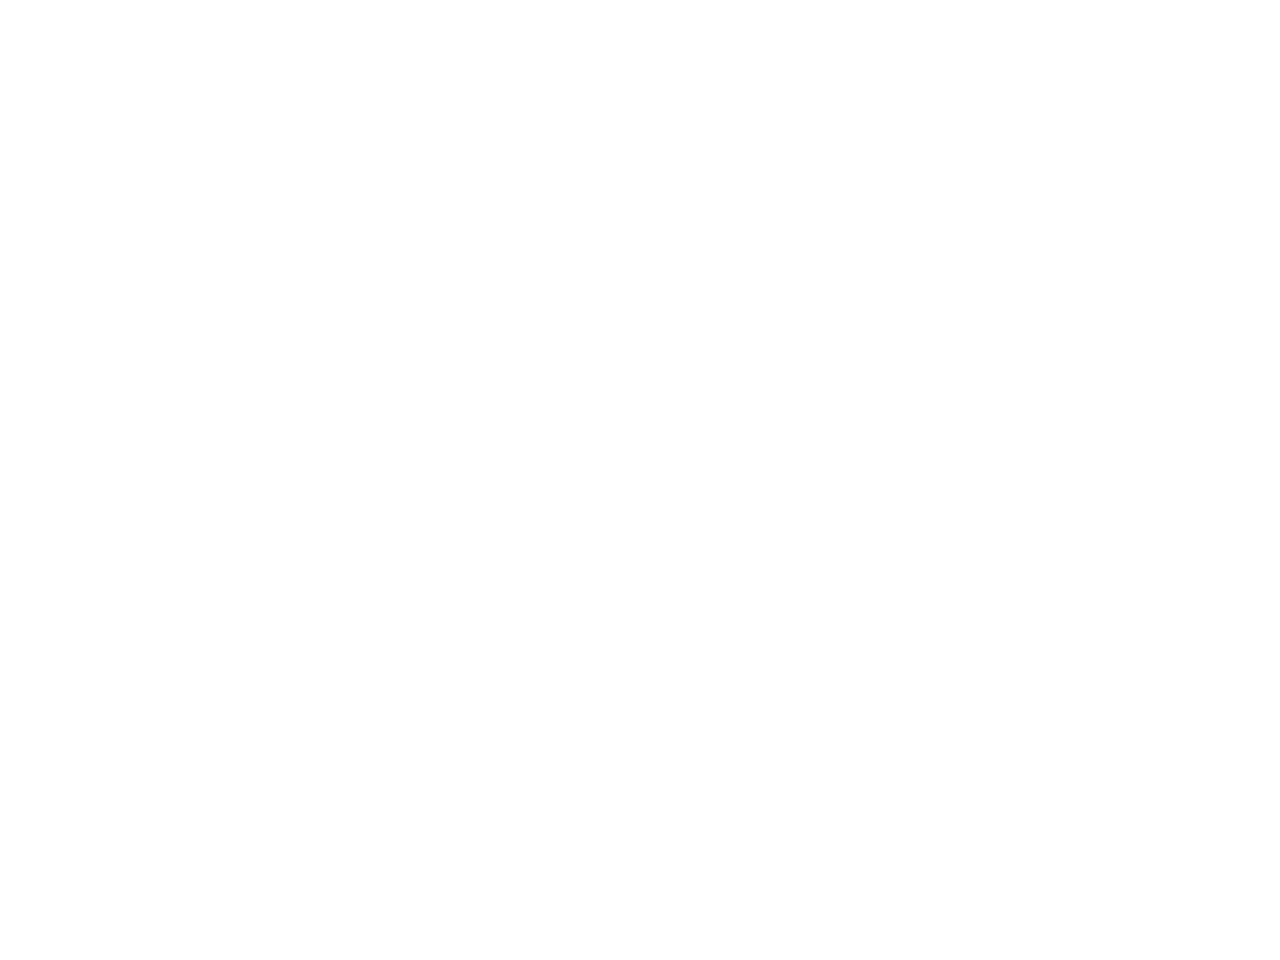

In [4]:
x = A25B10["pressure"].iloc[32541:71898]
x = A25B33["pressure"].iloc[39613:80464]
x = A25B73["pressure"].iloc[51215:94171]
x = A25B83["pressure"].iloc[65067:107823]#faulty pressure readings
print(len(x))
fig, ax = plt.subplots()
ax.plot(x)



In [5]:



def mp_analysis(full_path):
    compute_motifs = "off"
    analyze = "on"
    
    df = pd.read_csv(full_path,names = ["time s/100","pressure"],header = 0)
    df = df.iloc[12500:26500]
    #df['pressure'].plot(figsize = (20,7))
    #plt.show()
    
    if compute_motifs == "on":


        windows = [
        ('1 sec', 100)]

        profiles = {}

        for label, window_size in windows:
            profile = mp.compute(df['pressure'].values, window_size)
            key = '{} Profile'.format(label)
            profiles[key] = profile
            motifs, neighbours = mp.discover.motifs(profile,k = 20)

            #snip = mp.discover.snippets(df['pressure'].values,10,3)

        #Plot the signal data
        fig, axes = plt.subplots(1,1,sharex=True,figsize=(15,10))

        for ax_idx, window in enumerate(windows):
            key = '{} Profile'.format(window[0])
            profile = profiles[key]
            axes[ax_idx].plot(profile['mp'])
            #axes[ax_idx].plot(snip['snippet'])
            axes[ax_idx].set_title(key)

        plt.xlabel('Pickup Datetime')
        plt.tight_layout()
        plt.show()
    
    if analyze == "on":
        profile, figures = mp.analyze(df['pressure'].values)
        return profile, figures
    

#profile, figures = mp_analysis(A14_path+"/B56.csv")







In [6]:
window = 200
profile_B13 = mp.compute(A14B13['pressure'].values, windows=window)
profile_B17 = mp.compute(A14B17['pressure'].values, windows=window)
profile_B56 = mp.compute(A14B56['pressure'].values, windows=window)
profile_B78 = mp.compute(A14B78['pressure'].values, windows=window)
profile_B82 = mp.compute(A14B82['pressure'].values, windows=window)
profile_B85 = mp.compute(A14B85['pressure'].values, windows=window)


In [7]:
#mp.visualize(profile_B56)
#mp.visualize(profile_B17)
#plt.imshow(profile_B17["mp"])


def heatmap(x):
    #fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(13, 6))
    fig, ax = plt.subplots(nrows=1, sharex=True,figsize=(14, 3))

    extent = [0, len(x),0,0.5]
    ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax.set_yticks([])
    ax.set_xlim(0, len(x))

    #ax2.plot(x)

    plt.tight_layout()
    plt.show()

def multi_heatmap(deployments):
    #plot multiple heatmaps in subplots
    #fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(13, 6))
    fig, ax = plt.subplots(nrows=len(deployments), sharex=True,figsize=(14, 10))
    
    for i in range(len(deployments)):
        x = deployments[i]
        extent = [0, len(x),0,0.5]
        ax[i].imshow(x[np.newaxis,:], aspect="auto", extent=extent)
        ax[i].set_yticks([])
        ax[i].set_xlim(0, len(x))



    plt.tight_layout()
    plt.show()
    

#heatmap(profile_B17["mp"],A14B17["time s/100"])
#heatmap(profile_B56["mp"],A14B56["time s/100"])

deployments = [profile_B13["mp"],profile_B17["mp"],profile_B56["mp"],profile_B78["mp"],profile_B82["mp"],profile_B85["mp"]]

#multi_heatmap(deployments)

# Query search
Look for features by passing snippets of the data

In [8]:
def plot_query(x,y,q_start,q_stop,features = 0):
    #x: matrix profile
    #y: data
    #q_stsrt/stop query satart stop
    
    for i in range(len(x)):
        if x[i]>5:
            x[i] = 15
    
    
    y = np.array(y)
    y_q = y[q_start:q_stop]
    fig, (ax,ax1,ax2) = plt.subplots(nrows=3, sharex=True,figsize=(9, 6))
    
    ax.plot(y,c="b")
    ax.plot(np.linspace(q_start,q_stop,len(y_q)),y_q,c="r",label = "Query")
    ax.plot(features,y[features],marker = "*",c="y",ls = "None")
    ax.set_ylabel("Pressure normalized")
    
    extent = [0, len(x),0,0.5]
    ax1.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax1.set_xlim(0, len(x))
    

    ax2.plot(x,c="g")
    ax2.set_ylabel("Matrix profile")

    plt.tight_layout()
    plt.legend()
    plt.show()
    
    
def plot_full_mp(data,mp,features = 0):
    #plot added mps after multiple queries
    y = np.array(data['pressure'])
    x = mp
    
    fig, (ax,ax1,ax2) = plt.subplots(nrows=3, sharex=True,figsize=(9, 6))
    ax.plot(y,c="b")
    ax.plot(features,y[features],marker = "*",c="y",ls = "None")
    ax.set_ylabel("Pressure normalized")
    extent = [0, len(x),0,0.5]
    ax1.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax1.set_xlim(0, len(x))
    ax2.plot(x,c="g")
    ax2.set_ylabel("Matrix profile")
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    

## Method:
Start by looking at one query, keeping a high threshold and trying to have as few false positives as possible. Keep adding new querys until it finds all steps. 

After spending a lot of time with the data, the "classic" step seems to exibit a rise in pressure as the drifter moves over the crest of the step, then a fall in pressure, followed by another rise. 

# Save selected query for thesis results
Compare reference measurments from 2020 2021

Plot hits by window size for one deployment

Try the englacial channel 19.082020

In thesis show different queries and resulting statistics. Why is the best query best?
Find the best query in video

Look at the video of andreas walking 


The drifters show a somewhat typical pattern in the pressure data when moving over a step. The patter is: A pressure increase as the drifter moves towards the crest of a step, a drop in pressure as it drops down the step and finally a pressure increase as it reaches the bottom of the step. However, these signals vary in length, magnitude and between trogh and peak values. Unfortunately other channel features may make a similar pattern, making it difficult do differentiate between steps and other features like meanders. 

Since not all steps have a distinct pattern i attempted to create a synthetic query based on multiple features to see if the mean signal would yeild better results than using a query of a single feature as a query. However, no synthetic signal gave a better result than using a single feature as a query. 
## A5-A1
4 steps

#B14 2
#B17 2
#B56 3
#B75 4
#B79 3
#B80 3
#B82 4
#B85 4
#B86 2

mean = (2+2+3+4+3+3+4+4+2)/9 = 3

## A6-A1
7 steps by Andreas

#b13 6
#B33 7
#B55 5
#B65 8
#B68 7
#B73 1
#B74 2
#B78 5

mean = (6+7+5+8+7+1+2+5)/8 = 5.125

## A7-A1
9 steps by Andreas

#B14 12
#B17 8
#B56 6
#B68 9
#B73 11
#B78 8
#B79 9
#B82 6
#B83 8

(12+8+6+9+11+8+9+6+8)/9 = 8.555555555555555

## A8-A1
11 by andreas
13 steps identified in video of B80. One of these steps is very small and may not yet be counted as a step
A8-A1 B80 18082020
This run yielded: 10 positive matches
                  2 false positives
### B10
Detected steps 10
### B13
Detected steps 9
### B33
Detected steps 8
### B55
Detected steps 11
### B65
Detected steps 12
### B74
Detected steps 8
### B75
Detected steps 12
### B84
Detected steps 16
### B85
Detected steps 14
### B86
Detected steps 6

10+9+8+11+12+8+12+16+14+6

## A9-A1
14 steps by andreas

#B10 9
#B13 12
#B17 14
#B33 13
#B75 22
#B78 22
#B79 13
#B84 15
#B85 14
#B86 12

(9+12+14+13+22+22+13+15+14+12)/10 = 14.6

## A10-A1
19 steps by andreas

#B14 23
#B55 26
#B56 17
#B65 17
#B73 26
#B74 26
#B80 23
#B82 26
#B83 19

(23+26+17+17+26+26+23+26+19)/9 = 22.6

## A11-A1
24 steps by andreas

#B55 21
#B56 26
#B74 27
#B80 18
#B82 27
#B85 23

(21+26+27+18+27+23)/6 = 23.7

## A12-A1
30 steps by andreas

#B13  24
#B14  29
#B17  30
#B33  28
#B65  25
#B73  25
#B75  25
#B78  24
#B86  25

(24+29+30+28+25+25+25+24+25)/9 = 26.1

## A13-A1
35 steps by andreas

### B55 
43
### B65 
25
### B74 
33
### B75 
29
### B79 
36
### B80 
33
### B86 
40
mean = (43+33+29+36+33+40)/6 = 35.6

## A14-A1
In A re analysis of deployment A14-B56 16 more steps were identified.
40 steps identified in video
56 steps in reanalysed video
54 steps identified by andreas

query
Indices from B56
11861#query start index
11935#query stop index


### B56 A14-A1 18082020
This run yield: 26 positive matches
                16 false positives
                2 matches that are so close to other matches they contain the same feature
                45 total excluding trivial match with self
                

Re analysis:
            32 positive matches
            12 false positives

#B56 45
#B13 41
#B17 46
#B78 43
#B82 43
#B84 43
#B85 43

(45+41+46+43+43+43+43)/7 = 43.4

## A15-A1
66 steps by andreas

#B33 51
#B55 52
#B68 51
#B74 48
#B84 55
#B85 58

mean = (51+52+51+48+55+58)/6 52.5

## A16
77 by andreas

#B13 58
#B33 84
#B55 59
#B74 70
#B84 66
#B85 55

mean(58+84+59+70+66+55)/6 = 65.3

## A17
89 by andreas

#B73 70
#B78 69
#B82 74
mean = (70+69+74)/3 = 71

## A18
95 by andreas

#B10 85
#B17 115 
#B33 77
#B73 67
#B74 90
#B75 65
#B83 73
#B86 66

mean = (85+115+77+67 +90+65+73+66)/8 =  79.8

## A20-A1
109
#B13 105
#B15 112
#B55 98
#B65 85
#B80 113
#B85 98

(105+112+98+85+113+98)/6 = 101.8
    


In [63]:
def mp_query(data,start,stop,query,threshold = None,features = np.array([0]),data_viz = "off",show_query = "off",var ="pressure"):
    #calculate mp with a given query
    #start stop: query start, stop
    #var: variable to look at
    #threshold: for visualization of the mp, cut out values higher than this
        
    query_profile = mp.compute(data[var].values, windows=(stop-start),query = query)
    y = np.array(data[var])
    
    #y_q = y[start:stop]
    x = query_profile["mp"]
        
    if threshold != None:
        x_i = x #make copy for loop
        for i in range(len(x)):
           #make values binary, either pass of not 
            if x_i[i]>threshold:
                x[i] = 100
            if x_i[i]<threshold:
                x[i] = 0
    
        #count hits
    step_count = 0
    for i in range(len(x)):
        if x[i] == 0:
            j = i+1
            if j >= len(x):
                break
            while x[j] == 0:
                x[j] = 100
                j += 1
                if j >= len(x):
                    break
                    
            step_count +=1
    
    k=0
    while k < len(x):
        if x[k] == 0:
            x[k-10:k] = 0
            x[k:k+10] = 0
            k = k+10
        else:
            k+=1
            
    print("Step count: ",step_count)
                
    if data_viz == "on":
        
        %matplotlib inline
        plt.rcParams.update({'font.size': 17})
        
        # make a color map of fixed colors
        cmap = colors.ListedColormap(["#0C7BDC", '#FFC20A'])
        bounds=[0,99,100]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        fig, (ax,ax1) = plt.subplots(nrows=2, sharex=True,figsize=(14, 10))

        extent = [0, len(x)/100,0,0.5]
        ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent,cmap=cmap,norm=norm)
        ax.set_yticks([])
        ax.set_xlim(0, len(x)/100)
        ax.tick_params(bottom = False,labelbottom = False)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0,(box.x1-box.x0), box.y1-0.6])
        
        ax1.plot(np.linspace(0,len(y),len(y))/100,y,c="#005AB5",label = "Pressure data")
        if show_query == "on":
            ax1.plot(np.linspace(start,stop,len(query))/100,query,c="#FE6100",label = "Query")
        if features.any() != 0:
            ax1.plot(features/100,y[features],marker = "X",c="#DC3220",markersize=8,ls = "None",label="Steps")
        ax1.set_ylabel("Pressure [hPa]")
        ax1.set_xlabel("Time [s]")
        
        box1 = ax1.get_position()
        ax1.set_position([box1.x0, box1.y0,(box1.x1-box1.x0), box1.y1+0.1])

        #ax2.plot(x,c="g")
        #ax2.set_ylabel("Matrix profile")

        #plt.tight_layout()
        plt.legend(loc="upper right")
        #plt.savefig('/Users/georgecowie/Documents/Master/Masteroppgave/img_and_figures/figures_mp/A8_B80_query_mp.eps', format='eps')
        plt.show()
        

    return query_profile["mp"]





# Channel statistics

Step count:  45


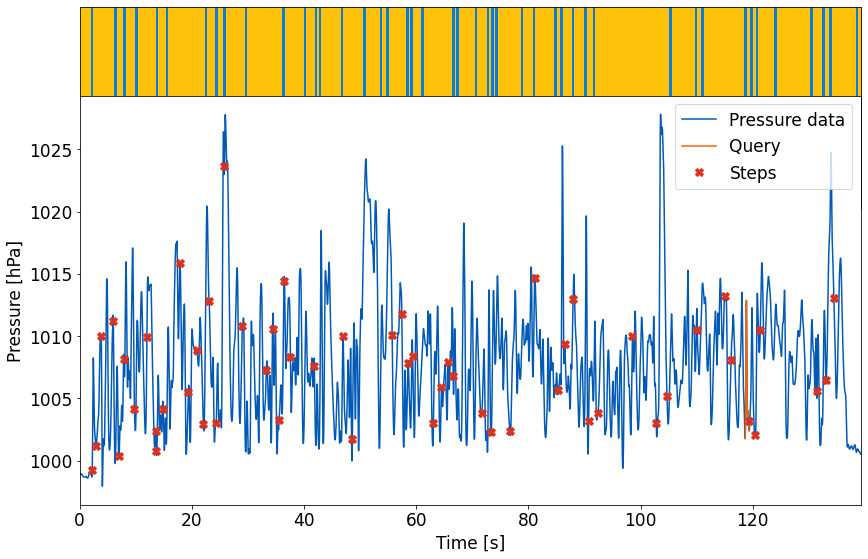

Step count:  41
Step count:  46
Step count:  43
Step count:  43
Step count:  43
Step count:  43


43.42857142857143

In [64]:
B56_start = 11861#query start
B56_stop = 11935#query_stop

#video features
query = A14B56['pressure'].values[B56_start:B56_stop]
mp_A14_B56_1 = mp_query(A14B56,B56_start,B56_stop,query,threshold = 5,features=steps_idx,data_viz = "on",show_query = "on")

#query from B56 dataset applied to subsequent sets from same channel section
mp_A14_B13 = mp_query(A14B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A14_B17 = mp_query(A14B17,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A14_B78 = mp_query(A14B78,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A14_B82 = mp_query(A14B82,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A14_B84 = mp_query(A14B84,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A14_B85 = mp_query(A14B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")

#B56 45
#B13 41
#B17 46
#B78 43
#B82 43
#B84 43
#B85 43

(45+41+46+43+43+43+43)/7


# Query search A14

# Query search A5

In [11]:
#mp_A5_B14 = mp_query(A5B14,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B17 = mp_query(A5B17,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B56 = mp_query(A5B56,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B75 = mp_query(A5B75,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B79 = mp_query(A5B79,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B80 = mp_query(A5B80,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B82 = mp_query(A5B82,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B85 = mp_query(A5B85,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")
#mp_A5_B86 = mp_query(A5B86,B56_start,B56_stop,query=query,threshold = 5,data_viz = "on")

#B14 2
#B17 2
#B56 3
#B75 4
#B79 3
#B80 3
#B82 4
#B85 4
#B86 2

(2+2+3+4+3+3+4+4+2)/9

3.0

# A6

In [12]:
#mp_A6_B13 = mp_query(A6B13,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B33 = mp_query(A6B33,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B55 = mp_query(A6B55,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B65 = mp_query(A6B65,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B68 = mp_query(A6B68,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B73 = mp_query(A6B73,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B74 = mp_query(A6B74,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')
#mp_A6_B78 = mp_query(A6B78,B56_start,B56_stop,query=query,threshold=5,data_viz = 'on')

#b13 6
#B33 7
#B55 5
#B65 8
#B68 7
#B73 1
#B74 2
#B78 5

(6+7+5+8+7+1+2+5)/8

5.125

In [13]:
#mp_A7_B14 = mp_query(A7B14,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B17 = mp_query(A7B17,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B56 = mp_query(A7B56,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B68 = mp_query(A7B68,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B73 = mp_query(A7B73,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B78 = mp_query(A7B78,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B79 = mp_query(A7B79,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B82 = mp_query(A7B82,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')
#mp_A7_B83 = mp_query(A7B83,B56_start,B56_stop,query=query,threshold=5,data_viz = 'off')

#B14 12
#B17 8
#B56 6
#B68 9
#B73 11
#B78 8
#B79 9
#B82 6
#B83 8

(12+8+6+9+11+8+9+6+8)/9

8.555555555555555

# Query search A8

In [14]:
#B80 with video features
mp_A8_B80 = mp_query(A8B80,B56_start,B56_stop,query,threshold = 5,features=A8_steps_idx,data_viz = "off")

#mp_A8_B10 = mp_query(A8B10,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#10
#mp_A8_B13 = mp_query(A8B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#9
#mp_A8_B33 = mp_query(A8B33,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#8
#mp_A8_B55 = mp_query(A8B55,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#11
#mp_A8_B65 = mp_query(A8B65,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#12
#mp_A8_B74 = mp_query(A8B74,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#8
#mp_A8_B75 = mp_query(A8B75,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#12
#mp_A8_B84 = mp_query(A8B84,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#16
#mp_A8_B85 = mp_query(A8B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#14
#mp_A8_B86 = mp_query(A8B86,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")#6


Step count:  12


In [15]:
mp_A9_B10 = mp_query(A9B10,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B13 = mp_query(A9B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B17 = mp_query(A9B17,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B33 = mp_query(A9B33,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B75 = mp_query(A9B75,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B78 = mp_query(A9B78,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B79 = mp_query(A9B79,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B84 = mp_query(A9B84,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B85 = mp_query(A9B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A9_B86 = mp_query(A9B86,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")

#B10 9
#B13 12
#B17 14
#B33 13
#B75 22
#B78 22
#B79 13
#B84 15
#B85 14
#B86 12

(9+12+14+13+22+22+13+15+14+12)/10

Step count:  9
Step count:  12
Step count:  14
Step count:  13
Step count:  22
Step count:  22
Step count:  13
Step count:  15
Step count:  14
Step count:  12


14.6

# A10

In [16]:
mp_A10_B14 = mp_query(A10B14,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B55 = mp_query(A10B55,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B56 = mp_query(A10B56,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B65 = mp_query(A10B65,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B73 = mp_query(A10B73,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B74 = mp_query(A10B74,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B80 = mp_query(A10B80,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B82 = mp_query(A10B82,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A10_B83 = mp_query(A10B83,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")

#B14 23
#B55 26
#B56 17
#65 17
#73 26
#74 26
#80 23
#82 26
#83 19

(23+26+17+17+26+26+23+26+19)/9

Step count:  23
Step count:  26
Step count:  17
Step count:  17
Step count:  26
Step count:  26
Step count:  23
Step count:  26
Step count:  19


22.555555555555557

# A11

In [17]:
mp_A11_B55 = mp_query(A11B55,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A11_B56 = mp_query(A11B56,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A11_B74 = mp_query(A11B74,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A11_B80 = mp_query(A11B80,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A11_B82 = mp_query(A11B82,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A11_B85 = mp_query(A11B85,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")

#B55 21
#B56 26
#B74 27
#B80 18
#B82 27
#B85 23

(21+26+27+18+27+23)/6 

Step count:  21
Step count:  26
Step count:  27
Step count:  18
Step count:  27
Step count:  23


23.666666666666668

# A12

In [18]:
mp_A12_B13 = mp_query(A12B13,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B14 = mp_query(A12B14,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B17 = mp_query(A12B17,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B33 = mp_query(A12B33,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B65 = mp_query(A12B65,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off") #drifting downwards
mp_A12_B73 = mp_query(A12B73,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B75 = mp_query(A12B75,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B78 = mp_query(A12B78,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")
mp_A12_B86 = mp_query(A12B86,B56_start,B56_stop,query = query,threshold = 5,data_viz = "off")

#B13  24
#B14  29
#B17  30
#B33  28
#B65  25
#B73  25
#B75  25
#B78  24
#B86  25

(24+29+30+28+25+25+25+24+25)/9


Step count:  24
Step count:  29
Step count:  30
Step count:  28
Step count:  25
Step count:  25
Step count:  25
Step count:  24
Step count:  25


26.11111111111111

# Query search A13

In [19]:
#mp_A13_B55 = mp_query(A13B55,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B65 = mp_query(A13B65,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B74 = mp_query(A13B74,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B75 = mp_query(A13B75,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B79 = mp_query(A13B79,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B80 = mp_query(A13B80,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')
#mp_A13_B86 = mp_query(A13B86,B56_start,B56_stop,query=query,threshold = 5, data_viz = 'off')

#B55 43
#B65 25 Should be discounted though since the data is drifting
#B74 33
#B75 29
#B79 36
#B80 33
#B86 40

# Query search A15

In [20]:
mp_A15_B33 = mp_query(A15B33,B56_start,B56_stop,query,threshold = 5, data_viz='off')
mp_A15_B55 = mp_query(A15B55,B56_start,B56_stop,query,threshold = 5, data_viz='off')
mp_A15_B68 = mp_query(A15B68,B56_start,B56_stop,query,threshold = 5, data_viz='off')
mp_A15_B74 = mp_query(A15B74,B56_start,B56_stop,query,threshold = 5, data_viz='off')
mp_A15_B84 = mp_query(A15B84,B56_start,B56_stop,query,threshold = 5, data_viz='off')
mp_A15_B85 = mp_query(A15B85,B56_start,B56_stop,query,threshold = 5, data_viz='off')

#B33 51
#B55 52
#B68 51
#B74 48
#B84 55
#B85 58

(51+52+51+48+55+58)/6


Step count:  51
Step count:  52
Step count:  51
Step count:  48
Step count:  55
Step count:  58


52.5

# A16

In [21]:
mp_A16_B13 = mp_query(A16B13,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A16_B33 = mp_query(A16B33,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A16_B55 = mp_query(A16B55,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A16_B74 = mp_query(A16B74,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A16_B84 = mp_query(A16B84,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A16_B85 = mp_query(A16B85,B56_start,B56_stop,query,threshold=5,data_viz='off')

#B13 58
#B33 84
#B55 59
#B74 70
#B84 66
#B85 55

(58+84+59+70+66+55)/6


Step count:  58
Step count:  84
Step count:  59
Step count:  70
Step count:  66
Step count:  55


65.33333333333333

# A17

In [22]:
mp_A17_B73 = mp_query(A17B73,B56_start,B56_stop,query,threshold = 5,data_viz = 'off')
mp_A17_B78 = mp_query(A17B78,B56_start,B56_stop,query,threshold = 5,data_viz = 'off')
mp_A17_B82 = mp_query(A17B82,B56_start,B56_stop,query,threshold = 5,data_viz = 'off')
#mp_A17_B83 = mp_query(A17B83,B56_start,B56_stop,query,threshold = 5,data_viz = 'off')

#B73 70
#B78 69
#B82 74
(70+69+74)/3

Step count:  70
Step count:  69
Step count:  74


71.0

# A18

In [23]:
mp_A18_B10 =mp_query(A18B10,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B17 =mp_query(A18B17,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B33 =mp_query(A18B33,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B73 =mp_query(A18B73,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B74 =mp_query(A18B74,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B75 =mp_query(A18B75,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B83 =mp_query(A18B83,B56_start,B56_stop,query,threshold=5,data_viz='off')
mp_A18_B86 =mp_query(A18B86,B56_start,B56_stop,query,threshold=5,data_viz='off')

#B10 85
#B17 115 
#B33 77
#B73 67
#B74 90
#B75 65
#B83 73
#B86 66

(85+115+77+67 +90+65+73+66)/8

Step count:  85
Step count:  115
Step count:  77
Step count:  67
Step count:  90
Step count:  65
Step count:  73
Step count:  66


79.75

# A20

Step count:  105


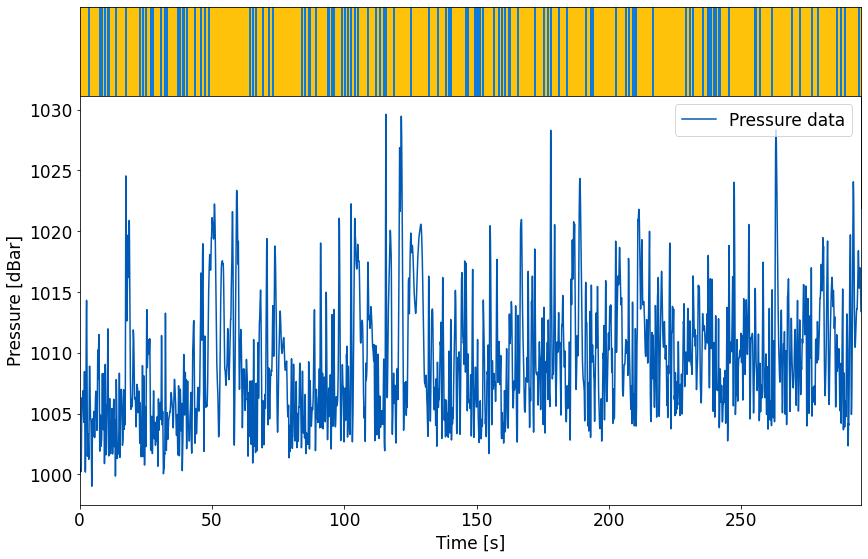

Step count:  112
Step count:  98
Step count:  85
Step count:  113
Step count:  98


101.83333333333333

In [24]:
mp_A20_B13 =mp_query(A20B13,B56_start,B56_stop,query,threshold = 5,data_viz='on')
mp_A20_B15 =mp_query(A20B15,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A20_B55 =mp_query(A20B55,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A20_B65 =mp_query(A20B65,B56_start,B56_stop,query,threshold = 5,data_viz='off')#this one is crap, data drifting downwards
mp_A20_B80 =mp_query(A20B80,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A20_B85 =mp_query(A20B85,B56_start,B56_stop,query,threshold = 5,data_viz='off')

#B13 105
#B15 112
#B55 98
#B65 85
#B80 113
#B85 98

(105+112+98+85+113+98)/6




#A25

In [25]:
mp_A25_B10 = mp_query(A25B10,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A25_B33 = mp_query(A25B33,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A25_B73 = mp_query(A25B73,B56_start,B56_stop,query,threshold = 5,data_viz='off')
mp_A25_B83 = mp_query(A25B83,B56_start,B56_stop,query,threshold = 5,data_viz='off')

print((145+148+134+137)/4)

Step count:  145
Step count:  148
Step count:  134
Step count:  137
141.0


# 2. query 
Create synthetic signal of multiple steps

In [26]:

"""Create signals of length 90 with two tops"""
B56_start = 3300#query start
B56_stop = 3390#query_stop
query1 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3420#query start
B56_stop = 3510#query_stop
query2 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3630#query start
B56_stop = 3720#query_stop
query3 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 4630#query start
B56_stop = 4720#query_stop
query4 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 11855#query start
B56_stop = 11945#query_stop
query5 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 9840#query start
B56_stop = 9930#query_stop
query6 = A14B56['pressure'].values[B56_start:B56_stop]



query_synth = (query2+query3+query6)/3

query = A14B56['pressure'].values[B56_start:B56_stop]
#mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query_synth,threshold = 6,features=steps_idx,data_viz = "on",show_query = "off")
#mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query6,threshold = 5.,features=steps_idx,data_viz = "on",show_query = "on")

#fig,ax = plt.subplots()
#ax.plot(query_synth)
#plt.show()


In [27]:
"""Create signal of length from trough-top-trough-top"""
B56_start = 530#query start
B56_stop = 670#query_stop
query1 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 905#query start
B56_stop = 1045#query_stop
query2 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 8080#query start
B56_stop = 8220#query_stop
query3 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 1900#query start
B56_stop = B56_start+140#query_stop
query4 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 3610#query start
B56_stop = B56_start+140#query_stop
query5 = A14B56['pressure'].values[B56_start:B56_stop]

B56_start = 8079#query start
B56_stop = B56_start+140#query_stop
query6 = A14B56['pressure'].values[B56_start:B56_stop]

query_synth = (query1+query2+query3+query4)/4

query = A14B56['pressure'].values[B56_start:B56_stop]
#mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query_synth,threshold = 8,features=steps_idx,data_viz = "on",show_query = "off")
#mp_A14_B56_2 = mp_query(A14B56,B56_start,B56_stop,query6,threshold = 5.,features=steps_idx,data_viz = "on",show_query = "on")

#fig,ax = plt.subplots()
#ax.plot(query_synth)
#plt.show()

# Derivative of pressure experiment
See if results are better looking at the derivative

In [28]:
import scipy.integrate as sint
from scipy import stats
def derivate_pressure(y,q_start,q_stop):
    #y: array
    #
    start = 0
    end = len(y)
    time = time_array(start,end)
    dx = 0.01
    #change time window? picewise
    #parametersise this based on mean velocity
    dy = np.diff(y)/dx
    dy_query = dy[q_start:q_stop]

    dy = pd.DataFrame(dy,columns=['pressure'])
    mp_query(dy,q_start,q_stop,dy_query,threshold = 4.,features=steps_idx,data_viz = "on",show_query = "on")
    return dy



#30/52-1 th =5
#q_start = 630
#q_stop = 719

#24/48-1
#q_start = 6260
#q_stop = 6363


#28/52-1 th = 3.3
q_start = 13131
q_stop = 13192

#26/51-1
q_start = 10238
q_stop = 10285
#v = derivate_pressure(A14B56['pressure'].values,q_start,q_stop)

#fig, ax = plt.subplots(figsize = (8,8))
#ax.plot(v)
#ax.plot(steps_idx,v[steps_idx],marker = "^",c="r",ls = "None")

# Create box around steps iterate, create cumulative mp
results are potentially better than shown but i have not allowed double counting. two lines may contain the same feature.

When searching in smaller datasets, there are true steps to match with. This method may work well for long segments?

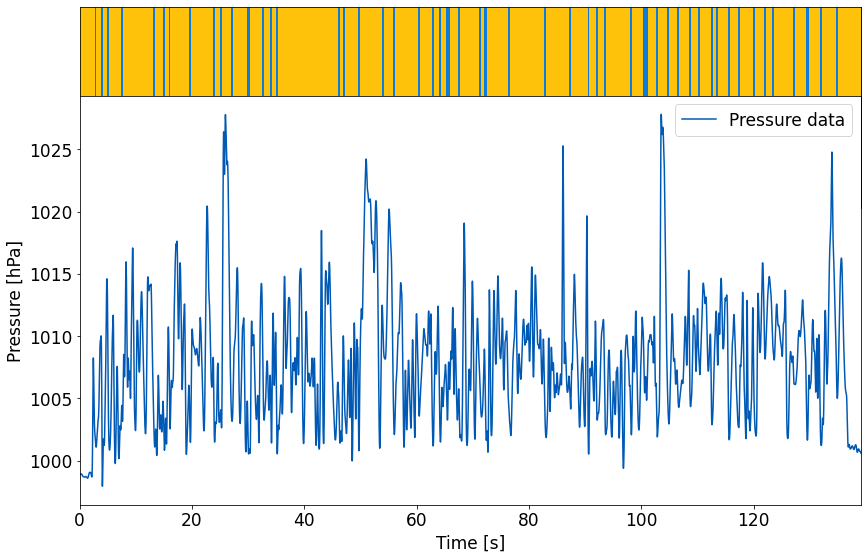

Step count:  55


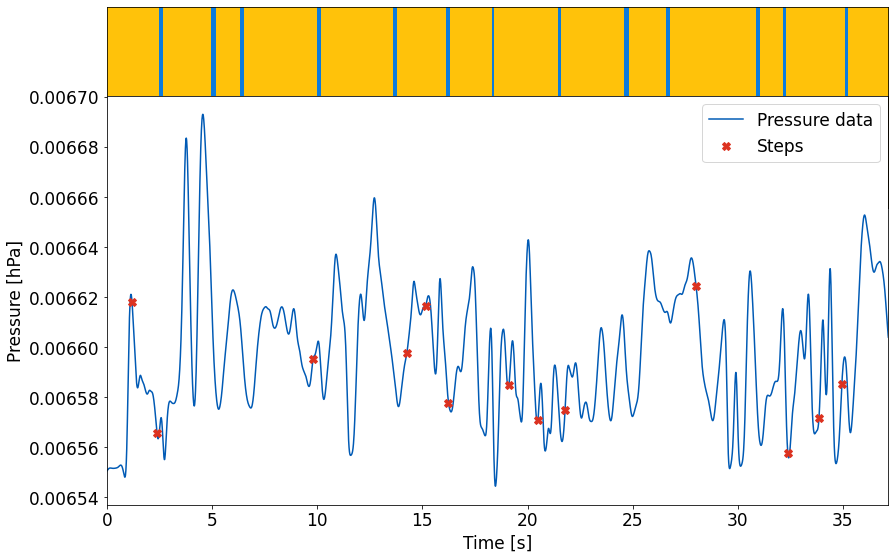

Step count:  13


13

In [77]:
def mp_iterate_query(data,ref_data,window = 100,threshold = None,features = np.array([0]),data_viz = 'off',show_qp='off',viz_features=0):
    #data: data to search for motifs
    #ref_data: data to draw queries from
    #calculate mp from multiple queries based on observations
    #n and a window size of m we extract n-m+1
    cum_query_profile = np.zeros(len(data)-window+1)

    k=0
    for i in range(1,len(features)):
        k+=1
        start = features[i] - int(window/2)
        stop = features[i] + int(window/2)
        
        query = ref_data[start:stop]
        cum_query_profile += mp.compute(data, windows=(stop-start),query = query)["mp"]
    
    cum_query_profile = (cum_query_profile/k)
    
    x = cum_query_profile
    if show_qp == 'on':
        fig,ax0 = plt.subplots(figsize=(10,8))
        ax0.plot(x)
        plt.show()
    
    if threshold != None:
        x_i = x #make copy for loop
        for i in range(len(x)):
           #make values binary, either pass of not 
            if x_i[i]>threshold:
                x[i] = threshold
            if x_i[i]<threshold:
                x[i] = 0
                
        #for i in range(len(x)):
            #gather hits that are close together
        #    if x[i] == 1:
        #        x[i:i+window] = 0
        #        x[i] = threshold
        
    

        
    if data_viz == 'on':
        fig, (ax,ax1) = plt.subplots(nrows=2, sharex=True,figsize=(14, 10))
        extent = [0, len(x)/100,0,0.5]
        cmap = colors.ListedColormap(["#0C7BDC", '#FFC20A'])
        bounds=[0,threshold-0.1,threshold]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent,cmap=cmap,norm=norm)
        ax.set_yticks([])
        ax.set_xlim(0, len(x)/100)
        ax.tick_params(bottom = False,labelbottom = False)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0,(box.x1-box.x0), box.y1-0.6])
        
        ax1.plot(np.linspace(0,len(data),len(data))/100,data,c="#005AB5",label="Pressure data")
        if np.any(viz_features) != 0:
            ax1.plot(viz_features/100,data[viz_features],marker = "X",c="#DC3220",markersize=8,ls = "None",label="Steps")
        ax1.set_ylabel("Pressure [hPa]")
        ax1.set_xlabel("Time [s]")    
        box1 = ax1.get_position()
        ax1.set_position([box1.x0, box1.y0,(box1.x1-box1.x0), box1.y1+0.1])

        #plt.tight_layout()
        plt.legend(loc=1)
        #plt.savefig('/Users/georgecowie/Documents/Master/Masteroppgave/img_and_figures/figures_mp/A8_iterate_B80_query_mp.eps', format='eps')
        plt.show()
    

        #count hits
    step_count = 0
    for i in range(len(x)):
        if x[i] == 0:
            j = i+1
            if j >= len(x):
                break
            else: 
                while x[j] == 0:

                    x[j] = threshold
                    j += 1
                    if j >= len(x):
                        break       
            step_count +=1
    print("Step count: ",step_count)
    return step_count

#35/59=0.59    
#mp_iterate_query(A14B56['pressure'].values,window = 100,threshold = 13,features = steps_idx)

#42/63=0.66666 th 16
#with whole window plotted 34/49 = 0.69
#42/63 with two window lengths 80 and 150 th 14
#mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = 150,threshold = 15.988,features = steps_idx,data_viz="on")
%matplotlib inline
plt.rcParams.update({'font.size': 17})
mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "on")
mp_iterate_query(A8B80['pressure'].values[:-100],A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "on",viz_features=A8_steps_idx)




#29/53=0.54 th 11.06
#with whole window plotted 36/59
#mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = 74,threshold = 11.06,features = steps_idx)

#37/60
#mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = 200,threshold = 18.6,features = steps_idx)

#42/64=0.65 th 22.7
#37/48= 0.77
#mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = 280,threshold = 22.55,features = steps_idx)

# Try to get correct number of features not correct hits

In [68]:
"""Mean Absolute Percentage Error:  0.18
Mean step miscount:  4.608756613756613
Threshold too high/low:  5.130555555555542"""
th_iter = 12.28
window_iter = 90


"""Mean Absolute Percentage Error:  0.09
Mean step miscount:  4.3411904761904765
Threshold too high/low:  54.25119047619047"""
#th_iter = 22.6
#window_iter = 280

"""Mean Absolute Percentage Error:  0.11
Mean step miscount:  3.8153439153439166
Threshold too high/low:  12.119047619047628"""
#th_iter = 22.62
#window_iter = 280

#th_iter = 18.68
#window_iter = 200

#A20
print('A20')
A20_mean = 0
A20_mean += mp_iterate_query(A20B13['pressure'].values,A14B56['pressure'].values,window = window_iter,
                             threshold = th_iter,features = steps_idx,data_viz = "off",show_qp='off')



A20
Step count:  97


In [69]:

#A25
print('A25')
A25_mean = 0
A25_mean += mp_iterate_query(A25B10['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A25_mean += mp_iterate_query(A25B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A25_mean += mp_iterate_query(A25B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A25_mean += mp_iterate_query(A25B83['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A25_mean = A25_mean/4
print('A25 error:', A25_mean,' ',155)

#A20
print('A20')
A20_mean = 0
A20_mean += mp_iterate_query(A20B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean += mp_iterate_query(A20B15['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean += mp_iterate_query(A20B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean += mp_iterate_query(A20B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean += mp_iterate_query(A20B80['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean += mp_iterate_query(A20B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A20_mean = A20_mean/6
print('A20 error:', A20_mean,' ',109)

print('\nA18')
A18_mean = 0
A18_mean += mp_iterate_query(A18B10['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B83['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean += mp_iterate_query(A18B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A18_mean = A18_mean/8
print('A18 mean:', A18_mean,' ',95)

print('\nA17')
A17_mean = 0
A17_mean += mp_iterate_query(A17B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A17_mean += mp_iterate_query(A17B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A17_mean += mp_iterate_query(A17B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A17_mean = A17_mean/3
print('A17 mean:', A17_mean,' ',89)

print('\nA16')
A16_mean = 0
A16_mean += mp_iterate_query(A16B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean += mp_iterate_query(A16B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean += mp_iterate_query(A16B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean += mp_iterate_query(A16B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean += mp_iterate_query(A16B84['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean += mp_iterate_query(A16B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A16_mean = A16_mean/6
print('A16 error:', A16_mean,' ', 77)

print('\nA15')
A15_mean = 0
A15_mean += mp_iterate_query(A15B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean += mp_iterate_query(A15B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean += mp_iterate_query(A15B68['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean+=  mp_iterate_query(A15B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean+=  mp_iterate_query(A15B84['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean+=  mp_iterate_query(A15B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A15_mean = A15_mean/6
print('A15 error:', A15_mean,' ', 66)


print('\nA14')
%matplotlib notebook
A14_mean = 0
A14_mean += mp_iterate_query(A14B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean += mp_iterate_query(A14B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean+=  mp_iterate_query(A14B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean += mp_iterate_query(A14B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean+=  mp_iterate_query(A14B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean+=  mp_iterate_query(A14B84['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean+=  mp_iterate_query(A14B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A14_mean = A14_mean/7
print('A14 error:', A14_mean,' ', 54)

print('\nA13')
A13_mean = 0
A13_mean += mp_iterate_query(A13B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean += mp_iterate_query(A13B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean+=  mp_iterate_query(A13B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean += mp_iterate_query(A13B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean+=  mp_iterate_query(A13B79['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean+=  mp_iterate_query(A13B80['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean+=  mp_iterate_query(A13B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A13_mean = A13_mean/7
print('A13 error:', A13_mean,' ', 35)

print('\nA12')
A12_mean = 0
A12_mean += mp_iterate_query(A12B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean += mp_iterate_query(A12B14['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean += mp_iterate_query(A12B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A12_mean+=  mp_iterate_query(A12B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

A12_mean = A12_mean/9
print('A12 error:', A12_mean,' ', 30)


print('\nA11')
A11_mean = 0
A11_mean += mp_iterate_query(A11B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean += mp_iterate_query(A11B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean += mp_iterate_query(A11B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean+=  mp_iterate_query(A11B80['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean+=  mp_iterate_query(A11B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean+=  mp_iterate_query(A11B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A11_mean = A11_mean/6
print('A11 error:', A11_mean,' ', 24)


print('\nA10')
A10_mean = 0
A10_mean += mp_iterate_query(A10B14['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean += mp_iterate_query(A10B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean += mp_iterate_query(A10B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B80['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A10_mean+=  mp_iterate_query(A10B83['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

A10_mean = A10_mean/9
print('A10 error:', A10_mean,' ', 19)


print('\nA9')
A9_mean = 0
A9_mean += mp_iterate_query(A9B10['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean += mp_iterate_query(A9B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean += mp_iterate_query(A9B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B79['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B84['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A9_mean+=  mp_iterate_query(A9B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")

A9_mean = A9_mean/10
print('A9 error:', A9_mean,' ', 14)



print('\nA8')
A8_mean = 0
A8_mean += mp_iterate_query(A8B10['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean += mp_iterate_query(A8B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean += mp_iterate_query(A8B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B84['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean+=  mp_iterate_query(A8B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A8_mean = A8_mean/10
print('A8 error:', A8_mean,' ', 11)


print('\nA7')
A7_mean = 0
A7_mean += mp_iterate_query(A7B14['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean += mp_iterate_query(A7B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean += mp_iterate_query(A7B68['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B79['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean+=  mp_iterate_query(A7B83['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A7_mean = A7_mean/9
print('A7 error:', A7_mean,' ', 9)

print('\nA6')
A6_mean = 0
A6_mean += mp_iterate_query(A6B13['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean += mp_iterate_query(A6B33['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean+=  mp_iterate_query(A6B55['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean += mp_iterate_query(A6B65['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean+=  mp_iterate_query(A6B68['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean+=  mp_iterate_query(A6B73['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean+=  mp_iterate_query(A6B74['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean+=  mp_iterate_query(A6B78['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A6_mean = A6_mean/8
print('A6 error:', A6_mean,' ', 7)


print('\nA5')
A5_mean = 0
A5_mean += mp_iterate_query(A5B14['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean += mp_iterate_query(A5B17['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B56['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean += mp_iterate_query(A5B75['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B79['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B80['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B82['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B85['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean+=  mp_iterate_query(A5B86['pressure'].values,A14B56['pressure'].values,window = window_iter,threshold = th_iter,features = steps_idx,data_viz = "off")
A5_mean = A5_mean/9

print('A5 error:', A5_mean,' ', 4)





A25
Step count:  151
Step count:  154
Step count:  170
Step count:  152
A25 error: 156.75   155
A20
Step count:  97
Step count:  111
Step count:  111
Step count:  102
Step count:  131
Step count:  106
A20 error: 109.66666666666667   109

A18
Step count:  82
Step count:  117
Step count:  102
Step count:  96
Step count:  88
Step count:  99
Step count:  95
Step count:  79
A18 mean: 94.75   95

A17
Step count:  80
Step count:  86
Step count:  70
A17 mean: 78.66666666666667   89

A16
Step count:  64
Step count:  56
Step count:  60
Step count:  67
Step count:  57
Step count:  64
A16 error: 61.333333333333336   77

A15
Step count:  69
Step count:  48
Step count:  61
Step count:  60
Step count:  57
Step count:  58
A15 error: 58.833333333333336   66

A14
Step count:  54
Step count:  43
Step count:  55
Step count:  45
Step count:  57
Step count:  41
Step count:  57
A14 error: 50.285714285714285   54

A13
Step count:  41
Step count:  35
Step count:  34
Step count:  41
Step count:  40
Step count: 

In [32]:
print(len(A25B10))
print(len(A25B33))
print(len(A25B73))
print(len(A25B83))

39357
40851
42956
42756


In [33]:
#query boxes from B56 dataset applied to subsequent sets from same channel section

#45 steps
#mp_iterate_query_A14_B13 = mp_iterate_query(A14B13["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

#49 steps
#mp_iterate_query_A14_B17 = mp_iterate_query(A14B17["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

#50 steps
#mp_iterate_query_A14_B78 = mp_iterate_query(A14B78["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

#55 steps
#mp_iterate_query_A14_B82 = mp_iterate_query(A14B82["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

#38 steps
#mp_iterate_query_A14_B84 = mp_iterate_query(A14B84["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

#47 steps
#mp_iterate_query_A14_B85 = mp_iterate_query(A14B85["pressure"].values,A14B56["pressure"].values,window = 150,threshold=16,features = steps_idx)

In [34]:
#with video features
mp_iterate_A8_B80 = mp_iterate_query(A8B80["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16.,features=A8_steps_idx)
mp_iterate_A8_B13 = mp_iterate_query(A8B13["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16.,features=B13_A8_steps_idx)


#Without video
#mp_iterate_A8_B10 = mp_iterate_query(A8B10["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B33 = mp_iterate_query(A8B33["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B55 = mp_iterate_query(A8B55["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B65 = mp_iterate_query(A8B65["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B74 = mp_iterate_query(A8B74["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B75 = mp_iterate_query(A8B75["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B84 = mp_iterate_query(A8B84["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B85 = mp_iterate_query(A8B85["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)
#mp_iterate_A8_B86 = mp_iterate_query(A8B86["pressure"].values, A14B56["pressure"].values,window=150,threshold = 16,features=A8_steps_idx)

Step count:  27
Step count:  29


# Random index test

In this test we will see if the query search method performs better than randomly generated indexes along the time series. The same number of "hits" as the best query search will be distributed aling the time series and compared to the actual steps with the same method as above

[  154   369   950  1613  1670  1920  1928  2112  2271  2550  2640  2862
  3016  3067  4144  4284  4338  4415  4520  5796  6612  7119  7147  7444
  7492  8138  8477  8615  9636  9756 10239 10251 10273 10468 10541 10928
 11829 12012 12486 12575 12778 12975 13035 13076 13283]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


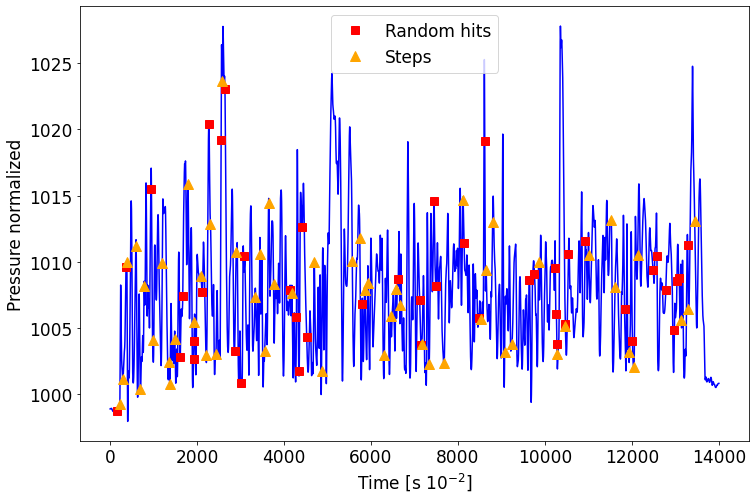

Mean of random tests:  20.5


In [35]:
def random_test(data,hits_n,features = np.array([0]),var ="pressure",seed = 1):
    random.seed(seed)

    y = np.array(data[var])
    rand_mp = np.zeros(hits_n)
    for i in range(hits_n):
        rand_idx = random.randint(0, len(data))
        rand_mp[i] = (rand_idx)
   
    rand_mp = np.sort(rand_mp).astype(int)
    print(rand_mp)

    
    fig, ax = plt.subplots(nrows = 1, figsize=(12, 8))
    ax.plot(y,c="b")
    ax.set_ylabel("Pressure normalized")
    ax.set_xlabel("Time [s $10^{-2}$]")
    if features.any() != 0:
        ax.plot(rand_mp,y[rand_mp],marker = "s",c="r",ls = "None",label = "Random hits",markersize = '8')
        ax.plot(features,y[features],marker = "^",c="orange",ls = "None",label="Steps",markersize ='10')
        
    plt.legend()
    plt.savefig('/Users/georgecowie/Documents/Master/Masteroppgave/img_and_figures/figures_mp/A14_random_idex_test.eps', format='eps')
    plt.show()
    

#23 hits
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=10)

#21
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=35)

#23
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=63)

#19
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=1034)

#18
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=10084)

#17
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=20459)

#20
random_test(A14B56,45,features = steps_idx,var ="pressure",seed=55459)

#17
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=25759)

#23
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=207759)

#24
#random_test(A14B56,45,features = steps_idx,var ="pressure",seed=2090459)

mean_random_test = (23+21+23+19+18+17+20+17+23+24)/10

print("Mean of random tests: ",mean_random_test)


# Query search acceleration data
gleason 2016

In this section i will show the results obtained from the vertical acceleration of the drifters. The accelerometers onboard the drifters are rotated to an NED reference frame using pre calculated euler angles provided by the sensor. The Sensor creates the euler angles by referencing the acceleration to magnetometer readings. By integrating the acceleration we get the drifter velocities. The drifters accelerate as they move over steps so this should be visible in the velocity. The drifters movement in steps is primarily in the vertical direction. Rapid changes in the vertical velocity are charecteristic of steps and there are not many other channel features that produce this behaviour. Therfore, this might create a charecteristic signal in the vertical velocity that can be detected using a query search.   

Step count:  34


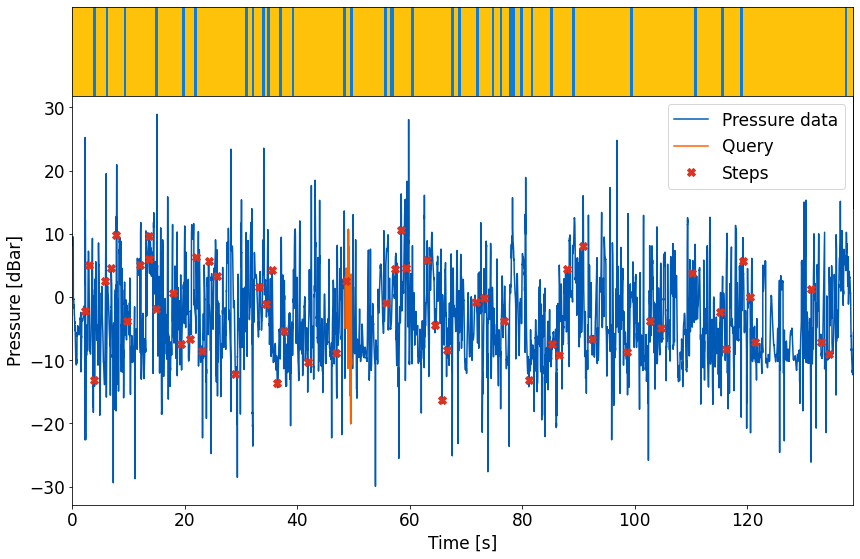

56


In [36]:
#load acceleration data
rotated_path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/2020/processed_drifter_data/rotated_data/"
#acc_A14_B56 = pd.read_csv(rotated_path+"/A14_B56_rotated.csv",names = ["acc_z"],header = 0)

A14B13_acc_r = pd.read_csv(rotated_path + 'A14B13_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[6000:18050]
A14B17_acc_r = pd.read_csv(rotated_path + 'A14B17_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[10350:23800]
A14B56_acc_r = pd.read_csv(rotated_path + 'A14B56_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[12500:26500]
A14B78_acc_r = pd.read_csv(rotated_path + 'A14B78_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[20250:33500]
A14B82_acc_r = pd.read_csv(rotated_path + 'A14B82_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[23000:36500]
A14B84_acc_r = pd.read_csv(rotated_path + 'A14B84_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[26400:-1]
A14B85_acc_r = pd.read_csv(rotated_path + 'A14B85_acc_rotated.csv', names = ['acc_x','acc_y','acc_z']).iloc[26600:40200]

#28/48 steps
#B56_start = 2230#query start
#B56_stop = 2310#query_stop

#29/50
#B56_start = 10247#query start
#B56_stop = 10360#query_stop


#21/30 thershold 10
#B56_start = 10450#query start
#B56_stop = 10627#query_stop


#26/42 thershold 3.7
#B56_start = 13150#query start
#B56_stop = 13222#query_stop


#25/46 threshold 11
#B56_start = 618#query start
#B56_stop = 730#query_stop

#27/47 theshold 9
#B56_start = 277#query start
#B56_stop = 362#query_stop

#24/32 threshold 7
B56_start = 4848#query start
B56_stop = 4965#query_stop

query = A14B56_acc_r['acc_z'].values[B56_start:B56_stop]
mp_A14_B56_1 = mp_query(A14B56_acc_r,B56_start,B56_stop,query,threshold = 10,features=steps_idx,data_viz = "on",show_query = "on",var = "acc_z")
print(len(steps_idx))

# Iterate over multiple queries of acceleration and pressure

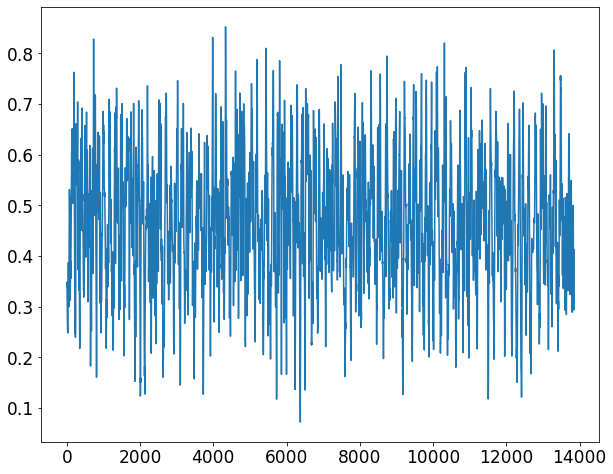

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


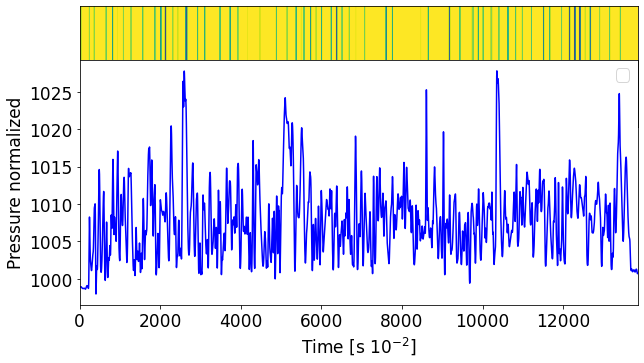

In [37]:
def mp_iterate_query_ac_p(data1,data2,ref_data1,ref_data2,window = 100,threshold = None,features = np.array([0])):
    #calculate mp from multiple queries based on observations. both acceleration and pressure
    #data1/2: data to search for motifs either pressure or acceleration
    #ref_data: data to draw queries from
    #n and a window size of m we extract n-m+1
    
    cum_query_profile = np.zeros(len(data1)-window+1)
    cum_query_profile1 = np.zeros(len(data1)-window+1)
    cum_query_profile2 = np.zeros(len(data2)-window+1)

    k=0
    for i in range(1,len(features)):
        k+=1
        start = features[i] - int(window/2)
        stop = features[i] + int(window/2)
        
        query1 = ref_data1[start:stop]
        query2 = ref_data2[start:stop]
        mp1 = mp.compute(data1, windows=window,query = query1)["mp"]
        mp2 = mp.compute(data2, windows=window,query = query2)["mp"]
        #mp1 = np.where(mp1 > np.mean(mp1), 100, mp1)
        #mp2 = np.where(mp2 > np.mean(mp2), 100, mp2)
        cum_query_profile1 += mp1
        cum_query_profile2 += mp2

    #max min normalize data so that the mps can be compared
    cum_query_profile1 = (cum_query_profile1 - cum_query_profile1.min()) / (cum_query_profile1.max() - cum_query_profile1.min())
    cum_query_profile2 = (cum_query_profile2 - cum_query_profile2.min()) / (cum_query_profile2.max() - cum_query_profile2.min())
 
    cum_query_profile = (cum_query_profile1+cum_query_profile2)/2
    
    x = cum_query_profile
    fig,ax0 = plt.subplots(figsize=(10,8))
    ax0.plot(cum_query_profile)
    plt.show()
    
    if threshold != None:
        x_i = x #make copy for loop
        for i in range(len(x)):
           #make values binary, either pass of not 
            if x_i[i]>threshold:
                x[i] = threshold
            if x_i[i]<threshold:
                x[i] = 0

    fig, (ax,ax1) = plt.subplots(nrows=2, sharex=True,figsize=(10, 6))
    extent = [0, len(x),0,0.5]
    ax.imshow(x[np.newaxis,:], aspect="auto", extent=extent)
    ax.set_yticks([])
    ax.set_xlim(0, len(x))
    ax.tick_params(bottom = False,labelbottom = False)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,(box.x1-box.x0), box.y1-0.6])
    ax1.plot(data1,c="b")
    #ax1.plot(data2,c='g')
    #ax1.plot(features,data1[features],marker = "^",c="orange",markersize=8,ls = "None",label="Steps")
    ax1.set_ylabel("Pressure normalized")
    ax1.set_xlabel("Time [s $10^{-2}$]")    
    box1 = ax1.get_position()
    ax1.set_position([box1.x0, box1.y0,(box1.x1-box1.x0), box1.y1+0.1])

    #plt.tight_layout()
    plt.legend()
    #plt.savefig('/Users/georgecowie/Documents/Master/Masteroppgave/img_and_figures/figures_mp/A8_iterate_B80_query_mp.eps', format='eps')
    plt.show()

#with video
#window size 150 not promising for other deployments
#39/59 = 0.66
mp_iterate_query_ac_p(A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 150,threshold = 0.25,features = steps_idx)



#mp_iterate_query_ac_p(A14B13['pressure'].values,A14B13_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)
#mp_iterate_query_ac_p(A14B17['pressure'].values,A14B17_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)
#mp_iterate_query_ac_p(A14B78['pressure'].values,A14B78_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)
#mp_iterate_query_ac_p(A14B82['pressure'].values,A14B82_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)
#mp_iterate_query_ac_p(A14B84['pressure'].values,A14B84_acc_r['acc_z'].values[:-1],A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)
#mp_iterate_query_ac_p(A14B85['pressure'].values,A14B85_acc_r['acc_z'].values,A14B56['pressure'].values,A14B56_acc_r['acc_z'].values,window = 286,threshold = 0.27,features = steps_idx)




In [38]:
"""

#query = A14B56['pressure'].values[q_start:q_stop]
#query_profile_B56 = mp.compute(A14B56['pressure'].values, windows=(q_stop-q_start),query = query)

B56_start = 9823#query start
B56_stop = 9955#query_stop
#mp1 = mp_query(A14B56,B56_start,B56_stop,threshold = 4,features=A14_HF_idx,data_viz = "off")
mp1 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")


B56_start = 3607#query start
B56_stop = 3772#query_stop
#mp2 = mp_query(A14B56,B56_start,B56_stop,threshold = 7,features=A14_HF_idx,data_viz = "off")
mp2 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")



B56_start = 6191#query start
B56_stop = 6425#query_stop
#mp3 = mp_query(A14B56,B56_start,B56_stop,threshold = 10,features=A14_HF_idx,data_viz = "off")
mp3 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")



B56_start = 9155#query start
B56_stop = 9300#query_stop
#mp4 = mp_query(A14B56,B56_start,B56_stop,threshold = 5,features=A14_HF_idx,data_viz = "off")
mp4 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")


B56_start = 4852#query start
B56_stop = 4972#query_stop
mp5 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 2211#query start
B56_stop = 2400#query_stop
mp6 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 534#query start
B56_stop = 697#query_stop
mp7 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")

B56_start = 13305#query start
B56_stop = 13490#query_stop
mp8 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")
full_mp = (mp1[:13767]+mp2[:13767]+mp3[:13767]+mp4[:13767]+mp5[:13767]+mp6[:13767]+mp7[:13767]+mp7[:13767])/8

tl = 15.0

for i in range(len(full_mp)):
    if full_mp[i]>tl:
        full_mp[i] = 1000

plot_full_mp(A14B56,full_mp,features=A14_HF_idx)"""






'\n\n#query = A14B56[\'pressure\'].values[q_start:q_stop]\n#query_profile_B56 = mp.compute(A14B56[\'pressure\'].values, windows=(q_stop-q_start),query = query)\n\nB56_start = 9823#query start\nB56_stop = 9955#query_stop\n#mp1 = mp_query(A14B56,B56_start,B56_stop,threshold = 4,features=A14_HF_idx,data_viz = "off")\nmp1 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")\n\n\nB56_start = 3607#query start\nB56_stop = 3772#query_stop\n#mp2 = mp_query(A14B56,B56_start,B56_stop,threshold = 7,features=A14_HF_idx,data_viz = "off")\nmp2 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")\n\n\n\nB56_start = 6191#query start\nB56_stop = 6425#query_stop\n#mp3 = mp_query(A14B56,B56_start,B56_stop,threshold = 10,features=A14_HF_idx,data_viz = "off")\nmp3 = mp_query(A14B56,B56_start,B56_stop,threshold = None,features=A14_HF_idx,data_viz = "off")\n\n\n\nB56_start = 9155#query start\nB56_stop = 9300#query_stop\n#mp4 = mp_qu